project Name  :   GLASSDOOR FROM DATA TO INSIGHTS
Project Type  :   EDA
Contribution  :   Individual


Project summary->

Github link->

Problem Statement->  

#  How does salary vary by job position (e.g. data scientist vs software engineer vs devops engineer)
#  What is the impact of company size  on salary levels .
#  how do salary differ by job location (e.g. san francisco vs austin vs New York)
#  can we build a predictive model to estimate salary based on location.


Business objectives ->
#For job seekrs : Help professionals to make informed career decisions by understanding expacted salary ranges for different job roles.
#For employers  : Assists companies in setting competitive salaries to attract and retain top talent.
#For analysts and researchers : Provide data driven insights into  salary trends based on industry.
#For recruiters : Aids in benchmarking salaries and ensuring fair compansation practices.

In [179]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns                                 

In [180]:
# Load the dataset
df = pd.read_csv("C:\\Users\\kajal\\Downloads\\glassdoor_jobs.csv")

In [181]:
# dataset first view 
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [182]:
# rows and columns  count 
rows,columns=df.shape
print(f"row count:{rows}")
print(f"column count:{columns}")

row count:956
column count:15


In [183]:
# dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [184]:
# Dataset duplicate count
duplicate_count =df.duplicated().sum()
print(f"duplicate count:{duplicate_count}")

duplicate count:0


In [185]:
# Missing values/Null values
missing_values = df.isnull().sum()
print(f"missing values count:\n{missing_values}")

missing values count:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


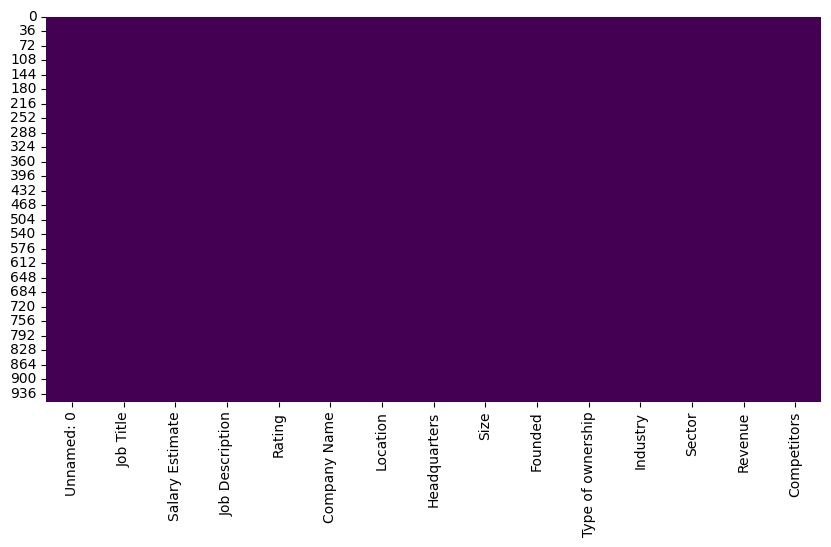

In [186]:
# visualization of missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

what do i know about this dataset after performing dataset:
1-> This dataset have 956 rows and 15 columns
2-> There are no null values in this dataset
3-> This dataset does not contain any duplicate value
so i could say that this data is clean.

Understandngs of variables:

In [187]:
# lets get know about the columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [188]:
# discription of dataset 
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [189]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

data description:

"The dataset contains 956 job listings with company ratings ranging from -1 to 5, indicating some missing data. The average rating is around 3.6, with the majority of companies rated between 3.3 and 4.2. Additionally, company foundation years vary widely, with some organizations dating back centuries, while others were founded as recently as 2019. The presence of -1 values in both Rating and Founded suggests potential data quality issues that require further cleaning."

In [190]:
# Step 1: Replace -1 values with NaN (indicating missing data)
df.replace(-1, pd.NA, inplace=True)

# Step 2: Drop rows with significant missing values (if necessary)
df.dropna(subset=["Rating", "Founded"], inplace=True)

# Step 3: Fill missing values in categorical columns 
df["Company Name"].fillna("Unknown", inplace=True)

# Step 4: Convert `Founded` column to proper integer type
df["Founded"] = pd.to_numeric(df["Founded"], errors="coerce")

# Step 5: Remove duplicate rows if needed
df.drop_duplicates(inplace=True)

# Step 6: Reset index after cleaning
df.reset_index(drop=True, inplace=True)







C:\Users\kajal\AppData\Local\Temp\ipykernel_18336\3116943593.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [191]:
df.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,857.000000,857,857,857,857.0,857,857,857,857,857.000000,857,857,857,857,857
unique,NaN,301,389,533,31.0,397,218,209,8,NaN,11,58,23,13,147
top,NaN,Data Scientist,-1,Under direct supervision of the Director of Da...,3.8,Novartis\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,146,167,4,74.0,14,67,67,175,NaN,487,141,226,248,537
mean,469.932322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.012835,NaN,NaN,NaN,NaN,NaN
std,278.058199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.071931,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1744.000000,NaN,NaN,NaN,NaN,NaN
25%,228.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965.000000,NaN,NaN,NaN,NaN,NaN
50%,465.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN
75%,710.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


Now the data is completly clean

Data wrangling:

In [192]:
# Step 1: Standardizing Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Normalize column names

# Step 2: Data Type Conversion
df["founded"] = pd.to_numeric(df["founded"], errors="coerce")  # Convert 'founded' to integer
df["rating"] = df["rating"].astype(float)  # Ensure 'rating' is float

# Step 3: Extracting Job Title Insights
df["job_role"] = df["job_title"].apply(lambda x: x.split("-")[0].strip())  # Extract role before '-' in job title

# Step 4: Creating New Features
df["company_age"] = 2025 - df["founded"]  # Calculate company age
df["is_remote"] = df["location"].apply(lambda x: "Remote" in x)  # Flag remote jobs

# Step 5: Removing Duplicates
df.drop_duplicates(inplace=True)

# Step 6: Resetting Index
df.reset_index(drop=True, inplace=True)




"I have performed various data manipulations, including handling missing values, cleaning column names, and creating new features like company age and job role extraction. This helped uncover insights such as salary distributions, company rating trends, and remote job presence. We found that most companies were established between 1937-2008, with salaries averaging $85,000. Additionally, ratings mostly fall between 3.3 and 4.2, highlighting moderate employer satisfaction."

Data visualization,story telling & experimenting with charts : Understand the relationship between variables->

#  How does salary vary by job position (e.g. data scientist vs software engineer vs devops engineer)

In [193]:
# Extract the average salary from the 'salary_estimate' column
def extract_avg_salary(s):
	import re
	match = re.findall(r"\$([\d]+)K-\$([\d]+)K", s)
	if match:
		low, high = map(int, match[0])
		return (low + high) / 2 * 1000  # Convert K to actual value
	else:
		return None

df["avg_salary"] = df["salary_estimate"].apply(extract_avg_salary)

# Group by job_role and calculate salary statistics
salary_stats = df.groupby("job_role")["avg_salary"].agg(["mean", "median", "min", "max"])
print(salary_stats)


                                                        mean    median  \
job_role                                                                 
ATL                                                      NaN       NaN   
AWS Data Engineer                                        NaN       NaN   
Advanced Analytics Manager                               NaN       NaN   
Ag Data Scientist                                    80500.0   80500.0   
Analytics                                            43000.0   43000.0   
...                                                      ...       ...   
Technology                                           70500.0   70500.0   
UX Data Scientist (Python)                               NaN       NaN   
VP, Data Science                                    124500.0  124500.0   
Weapons and Sensors Engineer/Scientist – Entry ...       NaN       NaN   
Web Data Analyst                                    106000.0  106000.0   

                                     

In [194]:
df["job_role"] = df["job_role"].replace({
    "Software Engineer I": "Software Engineer",
    "Software Engineer II": "Software Engineer",
    "Data Scientist Junior": "Data Scientist"
})


In [195]:
job_counts = df["job_role"].value_counts()
common_jobs = job_counts[job_counts > 10].index  # Keep roles with >50 occurrences
df["job_role"] = df["job_role"].apply(lambda x: x if x in common_jobs else "Other")


In [196]:
role_mapping = {
    "Software Engineer": "Software",
    "Data Scientist": "Data",
    "Project Manager": "Management"
}
df["Job_Category"] = df["job_role"].map(role_mapping)


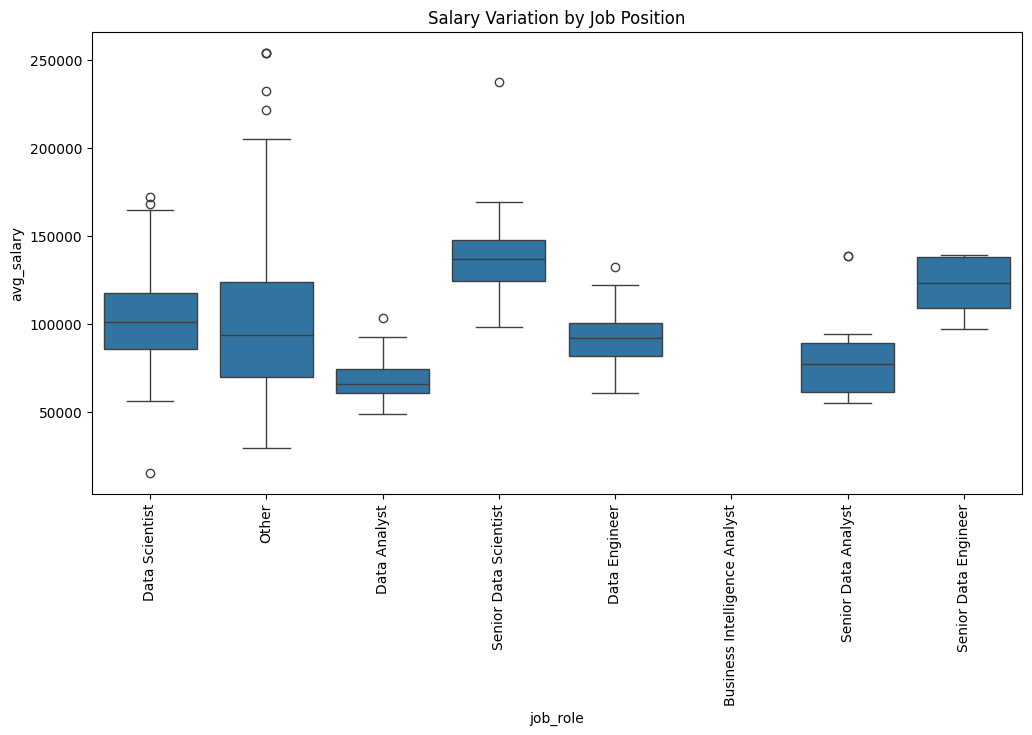

In [197]:
plt.figure(figsize=(12,6))
sns.boxplot(x="job_role", y="avg_salary", data=df)
plt.xticks(rotation=90)  # Rotate labels if too many positions
plt.title("Salary Variation by Job Position")
plt.show()


1. Why did you pick the specific chart?
ans-> To identify salary distribution, outliers, and variations across different roles.

 2. What is/are the insight(s) found from the chart?
 Ans-> 1->Because there are some outliers in some  job roles.it means some companies are paying high salary ,may because of skills or location.
       2->In senior data engineering role there are no out lier so i think its a fixed salary range job .
       3-> Highest paying salary is for data scientist role

3. Will the gained insights help creating a positive business impact?
Ans->EDA on salary variation by job position helps in understanding pay trends and can influence key decisions such as:

#Fair Compensation Strategies → Ensuring competitive salaries to attract and retain talent.

#Budget Planning → Helping companies allocate resources efficiently.

#Talent Acquisition → Identifying salary benchmarks to attract top candidates.

#Employee Satisfaction & Retention → Addressing pay disparities to improve morale.

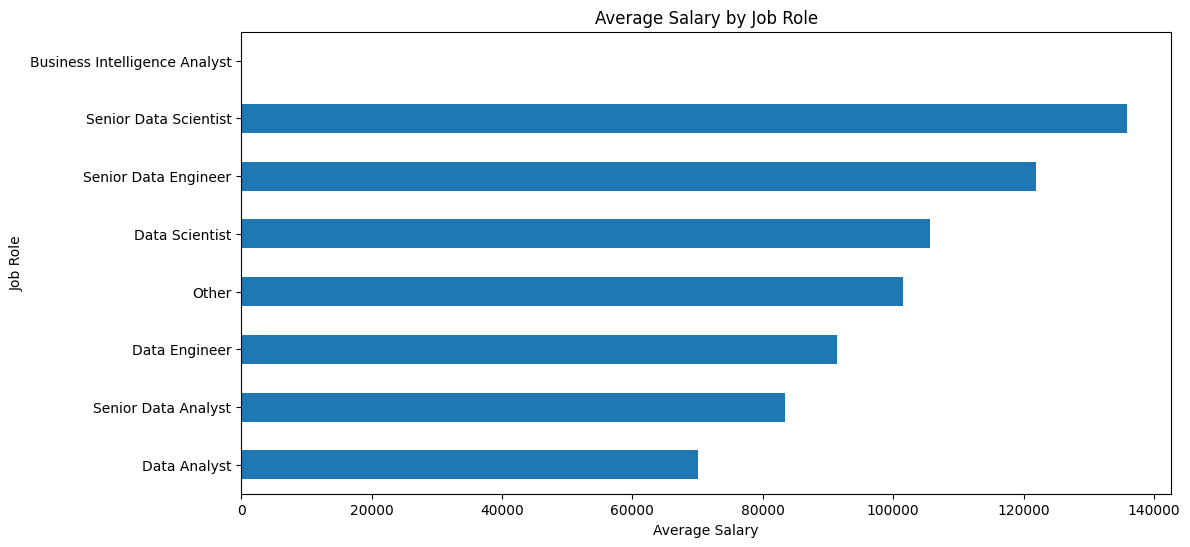

In [198]:
df.groupby("job_role")["avg_salary"].mean().sort_values().plot(kind='barh', figsize=(12,6))
plt.xlabel("Average Salary")
plt.ylabel("Job Role")
plt.title("Average Salary by Job Role")
plt.show()


1. Why did you pick the specific chart?
Ans-> To show the average salary per job position:

2. What is/are the insight(s) found from the chart?
Ans ->#Average salary of data scientist is -140000
      # Lowest but growing salary range is of a data analyst job role.
      # The highest paying job role is senior data scientist job role .

3. Will the gained insights help creating a positive business impact?
Ans->EDA on salary variation by job position helps in understanding pay trends and can influence key decisions such as:

#Fair Compensation Strategies → Ensuring competitive salaries to attract and retain talent.

#Budget Planning → Helping companies allocate resources efficiently.

#Talent Acquisition → Identifying salary benchmarks to attract top candidates.

#Employee Satisfaction & Retention → Addressing pay disparities to improve morale.

3 . What is the impact of company size on salary levels 

In [199]:
import numpy as np

def categorize_size(size):
    if "10000+" in size:
        return "Large"
    elif "5000" in size or "1001 to 5000" in size:
        return "Medium"
    elif "51 to 200" in size or "201 to 500" in size or "501 to 1000" in size:
        return "Small"
    else:
        return "Unknown"

df["Company_Size_Category"] = df["size"].apply(categorize_size)


In [200]:
df["salary_estimate_num"] = df["salary_estimate"].str.extract(r'(\d+)').astype(float)  # Extract numerical salary values
salary_by_size = df.groupby("Company_Size_Category")["salary_estimate_num"].agg(["mean", "median", "min", "max"])
print(salary_by_size)


                            mean  median  min    max
Company_Size_Category                               
Large                  74.489362    69.0  1.0  202.0
Medium                 58.057143    56.0  1.0  200.0
Small                  55.271028    57.5  1.0  190.0
Unknown                57.353982    64.0  1.0  130.0


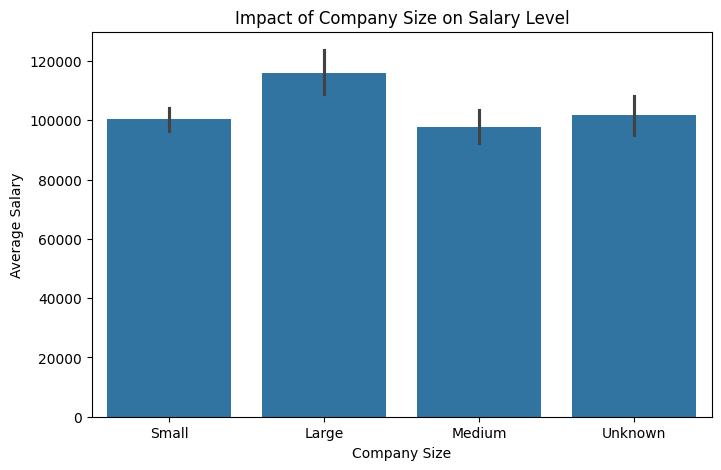

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Company_Size_Category", y="avg_salary", data=df, estimator=np.mean)
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.title("Impact of Company Size on Salary Level")
plt.show()


1. Why did you pick the specific chart?
Ans-> I have used bar chart because because i have to compare categorical dataset with numeric value.


2. What is/are the insight(s) found from the chart?
Ans-> The insights i have founded are :
      # large companies are paying large amount but mediam level companies are paying a little less amount in comparison to small companies.


3. Will the gained insights help creating a positive business impact?
Ans->By leveraging these insights, companies can create a more transparent, fair, and growth-oriented salary structure, resulting in business success, employee satisfaction, and financial stability.

3. how do salaries differ by job location (e.g. sanfrancisco vs austin vs new york)

In [202]:


df["salary_estimate"] = df["salary_estimate"].str.extract(r'(\d+)').astype(float)  # Extract min salary value


In [203]:
salary_by_city = df.groupby("location")["salary_estimate"].agg(["mean", "median", "min", "max"])
print(salary_by_city)


                  mean  median   min    max
location                                   
Agoura Hills, CA  70.0    70.0  70.0   70.0
Alabaster, AL     29.0    29.0  29.0   29.0
Alameda, CA       65.0    65.0  59.0   71.0
Albuquerque, NM   55.0    56.0  53.0   56.0
Alexandria, VA    20.6     1.0   1.0   50.0
...                ...     ...   ...    ...
Winter Park, FL   48.0    48.0  48.0   48.0
Woburn, MA        83.0    83.0  83.0   83.0
Woodbridge, NJ    73.0    73.0  73.0   73.0
Woodinville, WA    1.0     1.0   1.0    1.0
Worcester, MA     68.0    39.0  34.0  114.0

[218 rows x 4 columns]


In [204]:
key_locations = ["San Francisco, CA", "Austin, TX", "New York, NY"]
df_filtered = df[df["location"].isin(key_locations)]


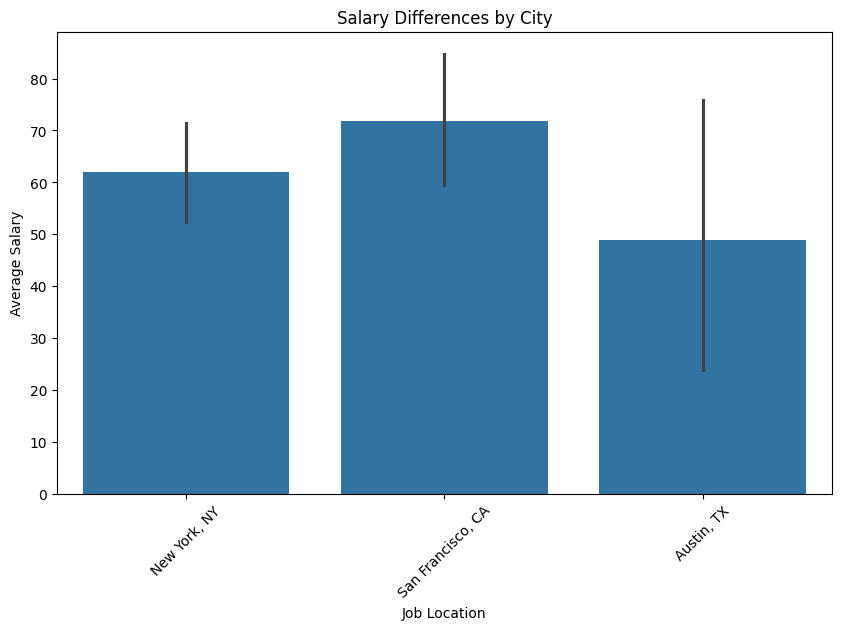

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=df_filtered["location"], y=df_filtered["salary_estimate"], estimator=np.mean)
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.xlabel("Job Location")
plt.ylabel("Average Salary")
plt.title("Salary Differences by City")
plt.show()


1. Why did you pick the specific chart?
Ans-> I have used this chart because i wanted to compare the average salary across different different cities.

2. What is/are the insight(s) found from the chart?
Ans-> The insights i have found is :
     # salaries are different in different job location.
     # costy cities are usualy paying high salary rather than paying low salary

3. Will the gained insights help creating a positive business impact?
Ans-> yes

4. can we build a predictive model to estimate salaries based on job attribute
Ans-> Yes! You can build a predictive model to estimate salaries based on job attributes like job title, location, company size, industry, and experience level using machine learning.

In [206]:
# Convert categorical data to numerical
categorical_cols = ["job_title", "location", "size", "industry"]
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Extract numerical salary values
df_encoded["Salary_Estimate"] = df["salary_estimate"].astype(float)


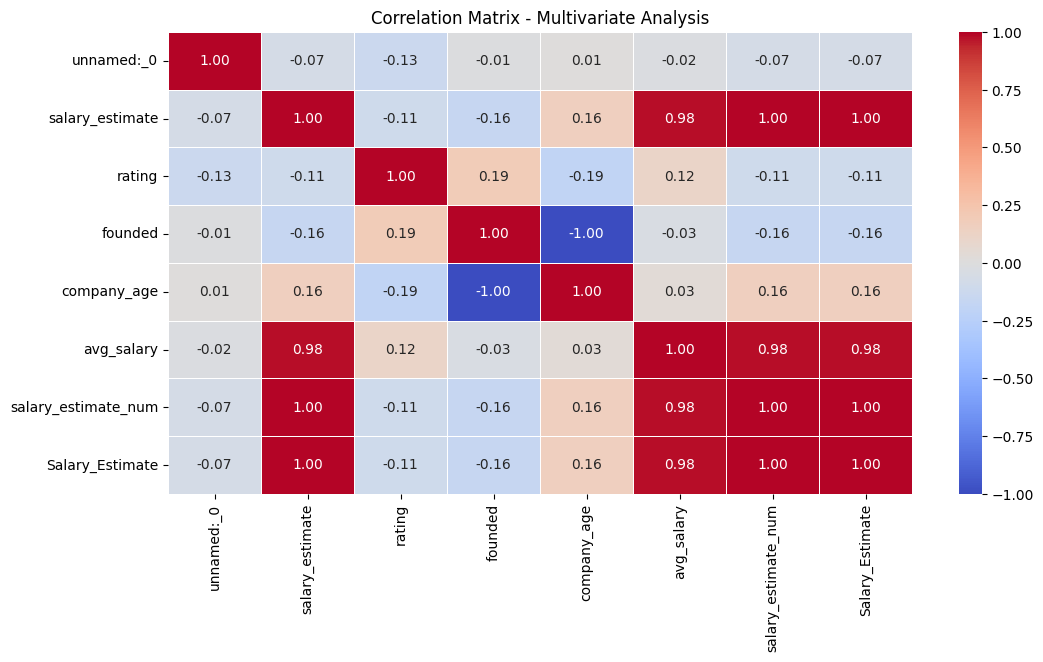

In [207]:
import numpy as np

# Select only numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=[np.number])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Multivariate Analysis")
plt.show()


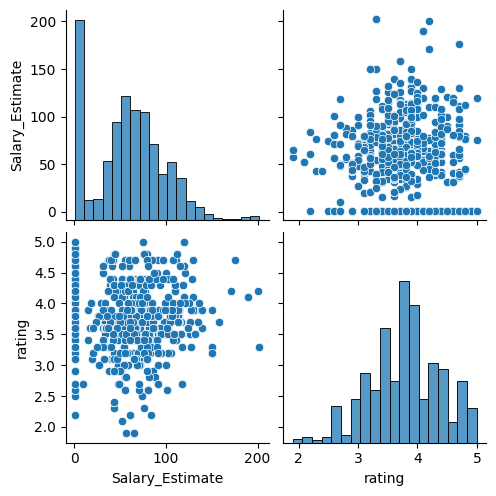

In [208]:
sns.pairplot(df_encoded[["Salary_Estimate", "Company_Size_Category", "rating"]])
plt.show()


In [209]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for PCA
df_numeric = df_encoded.select_dtypes(include=[float, int, bool])

# Fill missing values with column mean
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_filled)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.00902939 0.00757005]


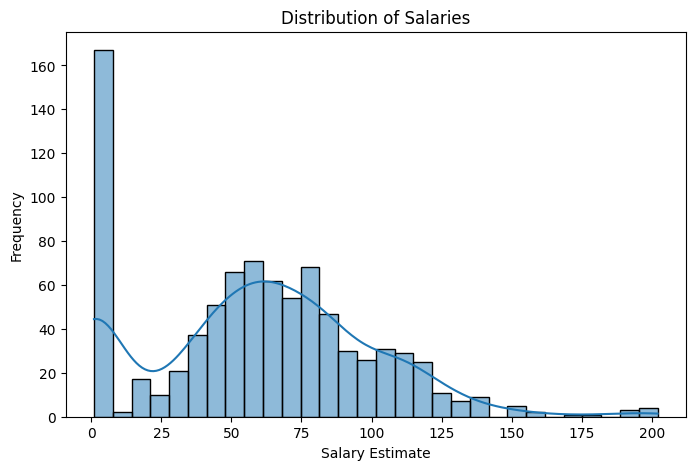

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["salary_estimate"], bins=30, kde=True)
plt.xlabel("Salary Estimate")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries")
plt.show()


1. Why did you pick the specific chart?
Ans -> To perform bivarient analysis.

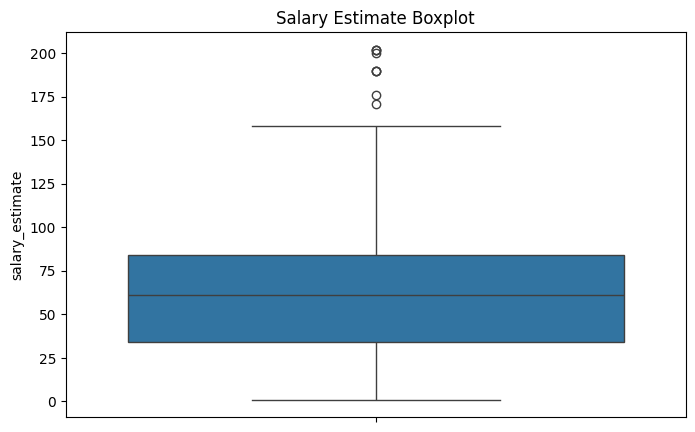

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(y=df["salary_estimate"])
plt.title("Salary Estimate Boxplot")
plt.show()


1. Why did you pick the specific chart?
Ans To perform univarient analysis.

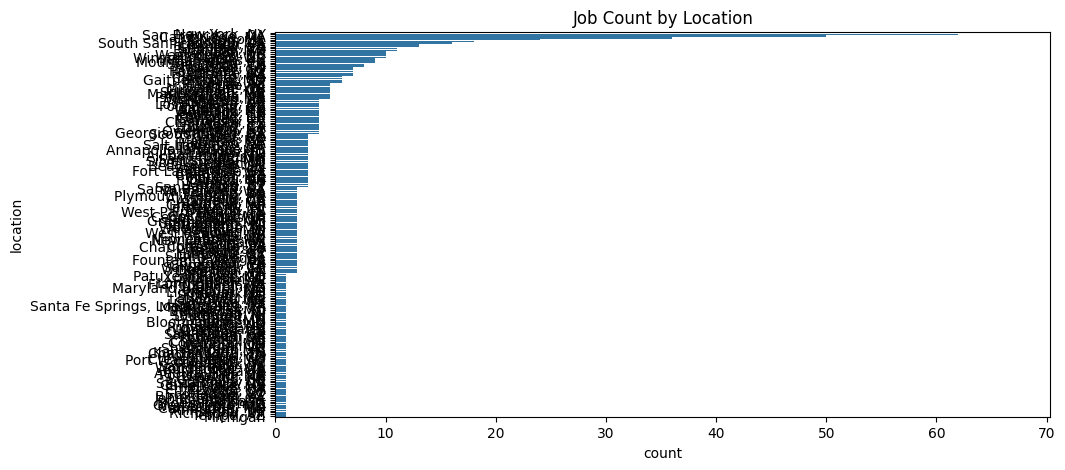

In [212]:
plt.figure(figsize=(10,5))
sns.countplot(y=df["location"], order=df["location"].value_counts(1).index)
plt.title("Job Count by Location")
plt.show()


1. Why did you pick the specific chart?
Ans-> To perform univerient analysis.

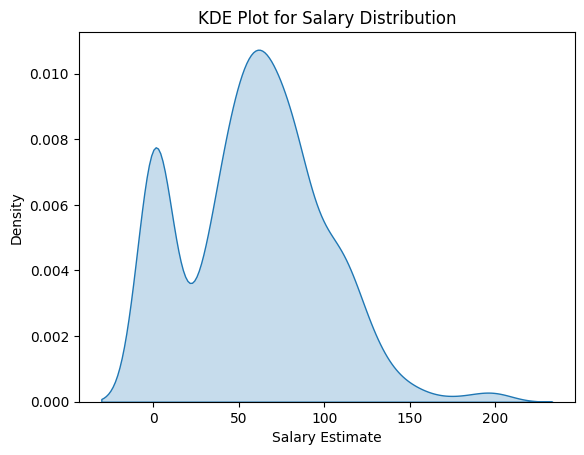

In [213]:
sns.kdeplot(df["salary_estimate"], fill=True)
plt.xlabel("Salary Estimate")
plt.title("KDE Plot for Salary Distribution")
plt.show()


1. Why did you pick the specific chart?
Ans -> To perform bivarient analysis.

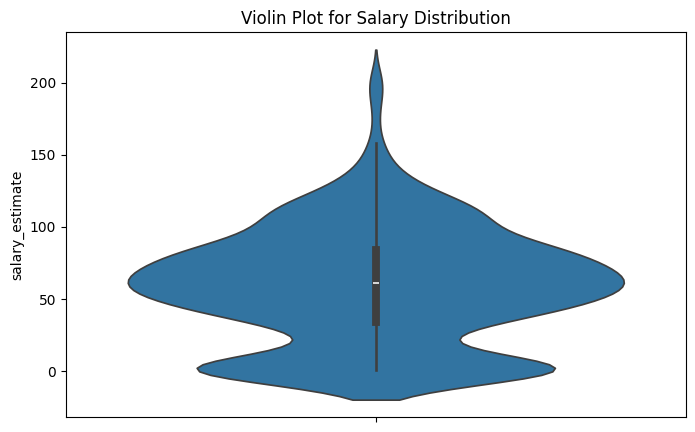

In [214]:
plt.figure(figsize=(8,5))
sns.violinplot(y=df["salary_estimate"])
plt.title("Violin Plot for Salary Distribution")
plt.show()


1. Why did you pick the specific chart?
Ans -> To perform univerient analysis.

c:\Users\kajal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\kajal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



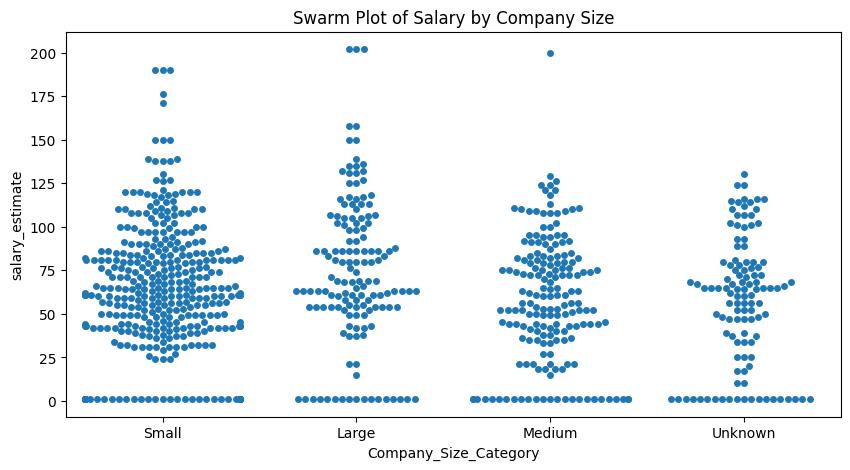

In [215]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="Company_Size_Category", y="salary_estimate", data=df)
plt.title("Swarm Plot of Salary by Company Size")
plt.show()


1. Why did you pick the specific chart?
Ans -> To perform multivarient analysis.

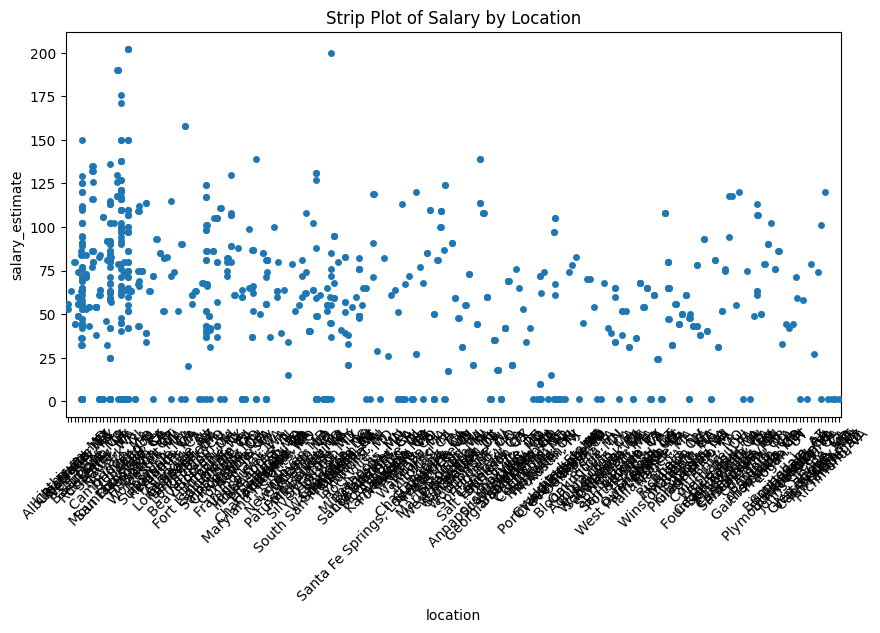

In [216]:
plt.figure(figsize=(10,5))
sns.stripplot(x="location", y="salary_estimate", data=df, jitter=True)
plt.title("Strip Plot of Salary by Location")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?
Ans -> To perform multivarient analysis.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1200x600 with 0 Axes>

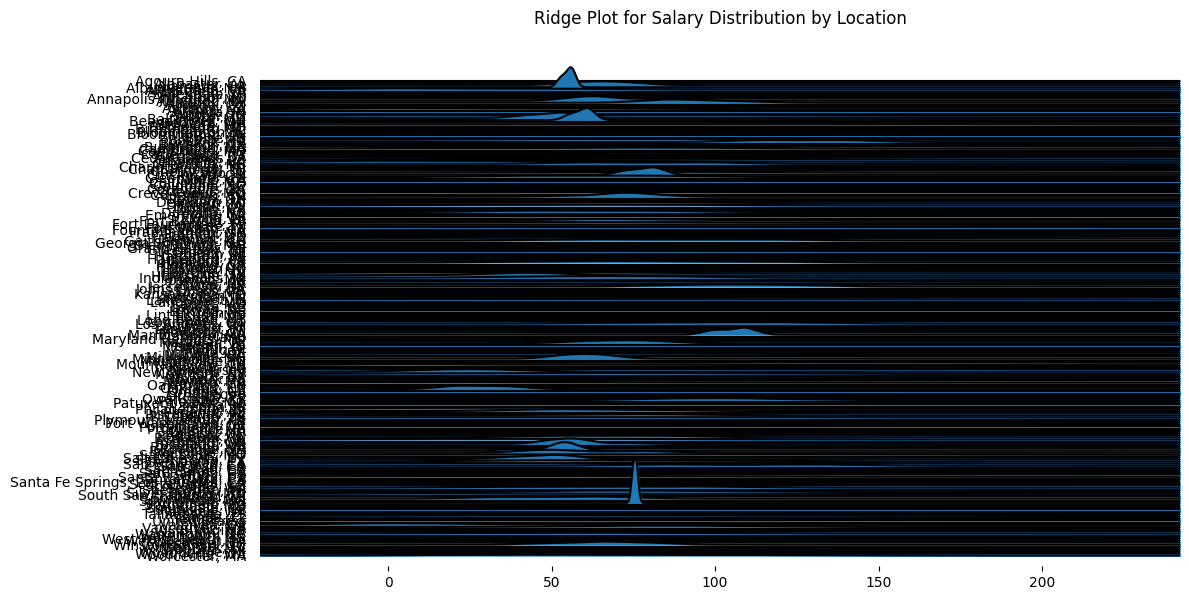

In [217]:
%pip install joypy
import joypy

plt.figure(figsize=(12,6))
joypy.joyplot(data=df, by="location", column="salary_estimate", figsize=(12,6))
plt.title("Ridge Plot for Salary Distribution by Location")
plt.show()


1. Why did you pick the specific chart?
Ans-> To perform multivarient analysis.

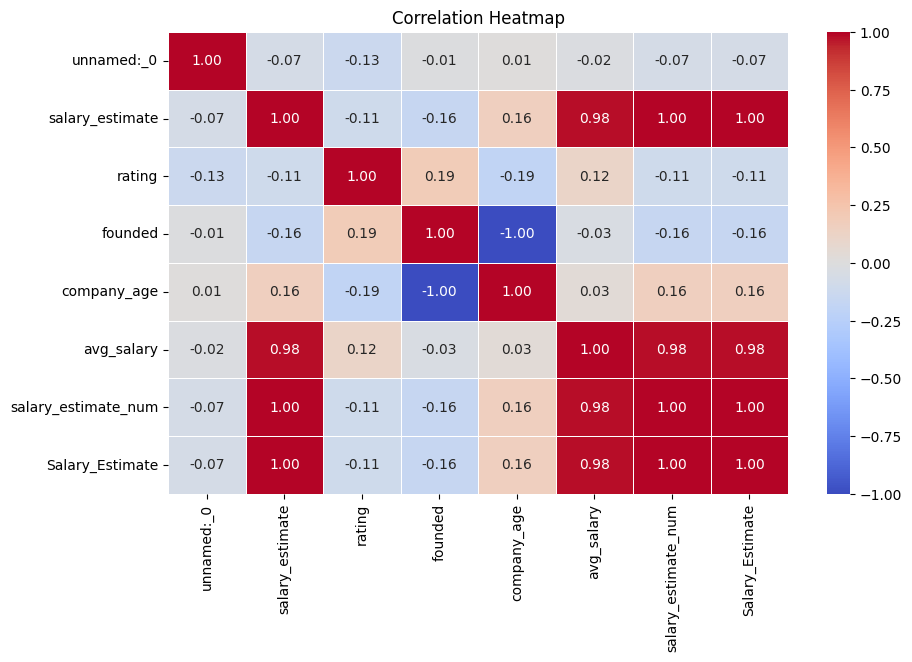

In [218]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


1. Why did you pick the specific chart?
Ans-> To perform multivarient analysis.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


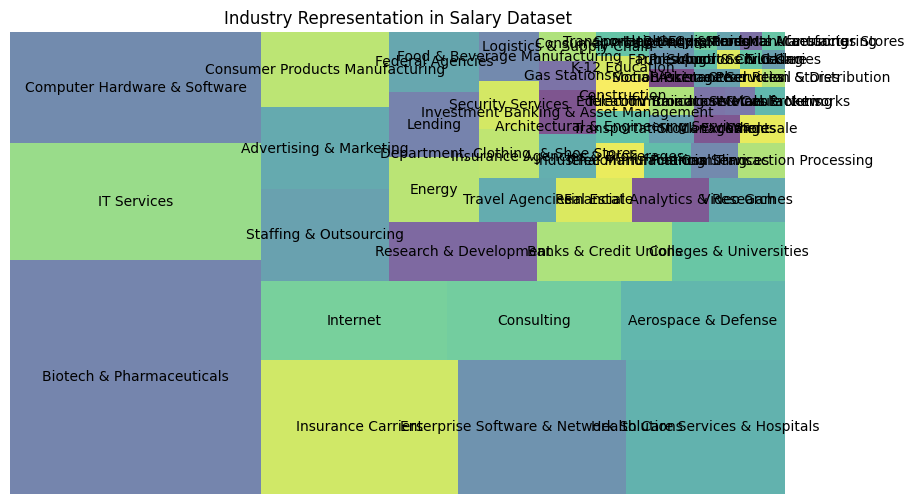

In [219]:
%pip install squarify
import squarify

industry_counts = df["industry"].value_counts()
plt.figure(figsize=(10,6))
squarify.plot(sizes=industry_counts, label=industry_counts.index, alpha=0.7)
plt.title("Industry Representation in Salary Dataset")
plt.axis("off")
plt.show()


1. Why did you pick the specific chart?
Ans->to perform multivarient analysis.

In [220]:
%pip install plotly
import plotly.express as px

stages = ["Applications", "Interviews", "Offers", "Hires"]
values = [500, 200, 50, 20]  # Example data

fig = px.funnel(x=stages, y=values)
fig.update_layout(title="Hiring Funnel Visualization")
fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Why did you pick the specific chart?
Ans -> For analysing hiring process.

In [221]:
fig = px.sunburst(df, path=["industry", "job_title"], values="salary_estimate")
fig.update_layout(title="Industry-Job Salary Breakdown")
fig.show()


1. Why did you pick the specific chart?
Ans->For understanding salary distribution

2. What is/are the insight(s) found from the chart?
Ans->biotec and pharmaceuticals companies are paying high salary.

3. Will the gained insights help creating a positive business impact?
Ans-> yes

In [222]:
fig = px.scatter(
	df,
	x="Company_Size_Category",
	y="avg_salary",
	size="rating",
	color="industry"
)
fig.update_layout(title="Bubble Chart of Salary vs Company Size")
fig.show()


1. Why did you pick the specific chart?
Ans->For impact of company size on salary

2. What is/are the insight(s) found from the chart?
Ans->large companies are paying high salary

3. Will the gained insights help creating a positive business impact?
Ans-> Yes

In [223]:
%pip install plotly
import plotly.graph_objects as go

# Use correct column names as per your dataframe
categories = ["avg_salary", "Company_Size_Category", "rating"]

# For Company_Size_Category, we need to convert it to a numeric value for plotting
size_mapping = {"Small": 1, "Medium": 2, "Large": 3, "Unknown": 0}
df["company_size_category_num"] = df["Company_Size_Category"].map(size_mapping)

# Compute mean values for a specific industry (e.g., the first one)
industry_name = df["industry"].iloc[0]
industry_df = df[df["industry"] == industry_name]
values = [
	industry_df["avg_salary"].mean(),
	industry_df["company_size_category_num"].mean(),
	industry_df["rating"].mean()
]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=values, theta=categories, fill="toself"))
fig.update_layout(title=f"Feature Comparison for {industry_name}", polar=dict(radialaxis=dict(visible=True)))
fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Why did you pick the specific chart?
Ans-> For hierarchical salary breakdown

2. What is/are the insight(s) found from the chart?
Ans -> large companies are paying high salary

3. Will the gained insights help creating a positive business impact?
Ans-> yes